In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

<h3>Reading the Dataset</h3>

In [2]:
df=pd.read_csv('loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.shape

(614, 13)

<h3>Data Preprocessing and EDA</h3>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


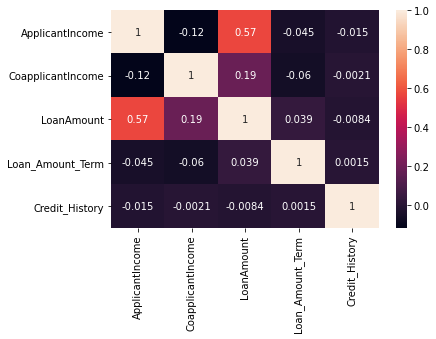

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.drop('Loan_ID',axis=1,inplace=True)

Let's replace the missing values in each columns with their respective column means to avoid losing data and misinterpretation of the data.

In [15]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [16]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [17]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [20]:
df.shape

(542, 12)

<h3>Data Visualization</h3>

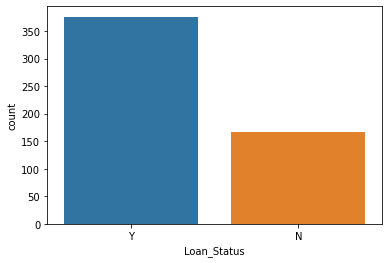

In [23]:
sns.countplot(df['Loan_Status'])

In [25]:
df['Loan_Status'].value_counts()

Y    376
N    166
Name: Loan_Status, dtype: int64

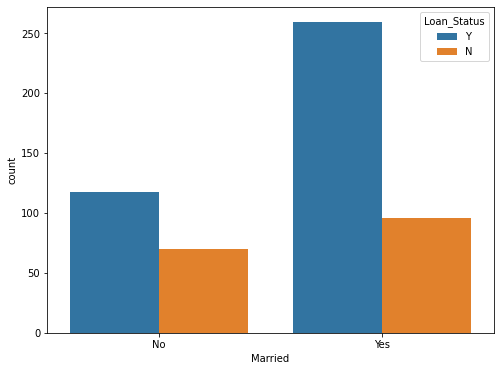

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='Married', hue='Loan_Status', data=df);

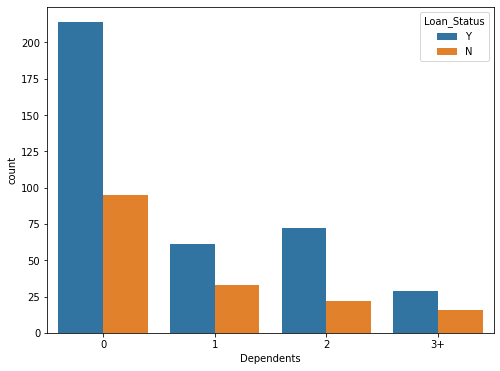

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

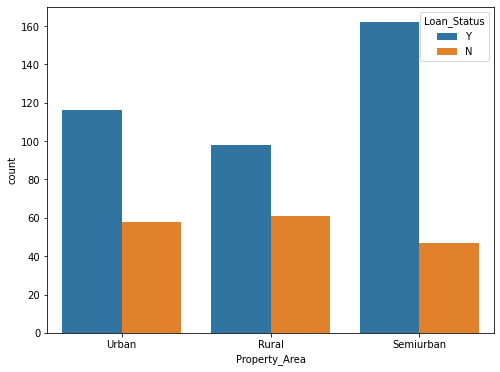

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);

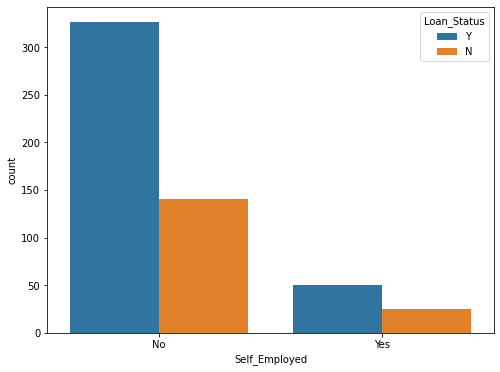

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df);

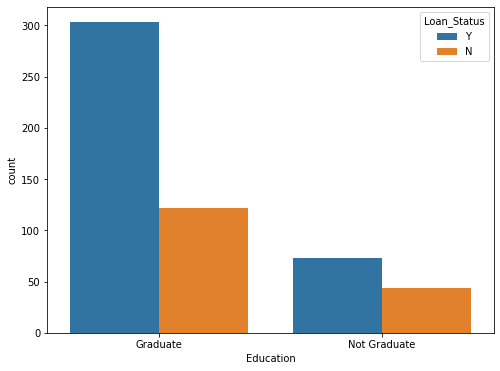

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='Education', hue='Loan_Status', data=df);

1.Most people who got married got a loan.
2.If Dependents are 0, we got higher chance to get a loan.
3.Semiurban Property_Area got more chance to get a loan.

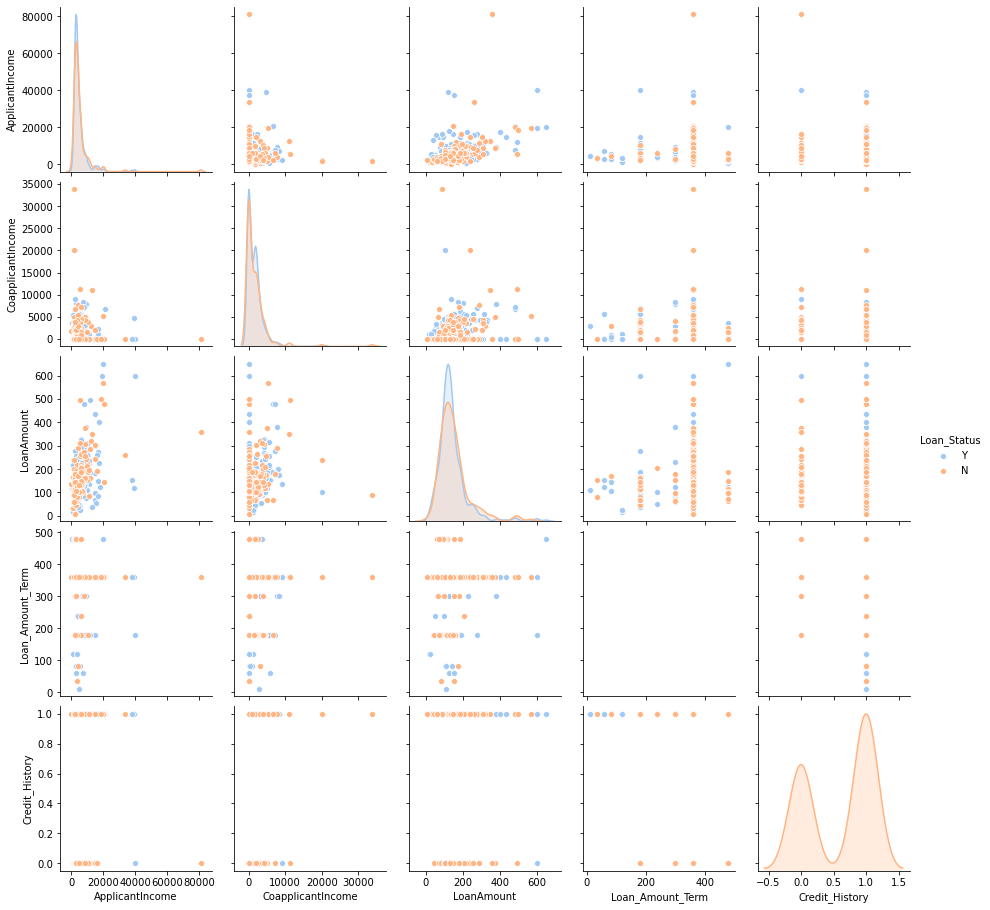

In [34]:
sns.pairplot(df,hue ='Loan_Status',palette='pastel')

In [35]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

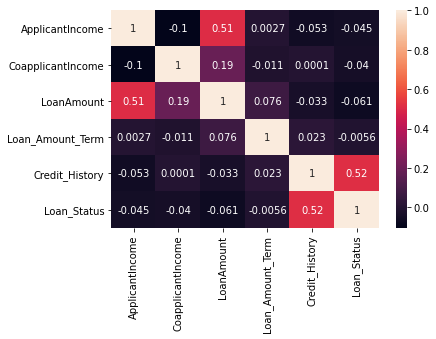

In [36]:
sns.heatmap(df.corr(),annot=True)

We can clearly see that Credit_History has the highest correlation with Loan_Status (a positive correlation of 0.54). Therefore our target value is highly dependant on this column.

<h3>Classification Models</h3>

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()

In [39]:
df=df.drop(labels=['ApplicantIncome'],axis=1)
df=df.drop(labels=['CoapplicantIncome'],axis=1)
df=df.drop(labels=['LoanAmount'],axis=1)
df=df.drop(labels=['Loan_Amount_Term'],axis=1)

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,1
1,Male,Yes,1,Graduate,No,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1
4,Male,No,0,Graduate,No,1.0,Urban,1


In [43]:
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.0,2,1
1,1,1,1,0,0,1.0,0,0
2,1,1,0,0,1,1.0,2,1
3,1,1,0,1,0,1.0,2,1
4,1,0,0,0,0,1.0,2,1


In [44]:
y = df['Loan_Status']
X = df.drop(['Loan_Status'], axis = 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

<h3>LOGISTIC REGRESSION</h3>

In [46]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lryhat=lr.predict(X_test)

In [47]:
accuracy_score(lryhat,y_test)

0.7914110429447853

<h3>SUPPORT VECTOR MACHINES</h3>

In [77]:
cl=SVC(kernel='rbf')
cl.fit(X_train,y_train)
clyhat=cl.predict(X_test)

In [78]:
accuracy_score(clyhat,y_test)

0.7914110429447853

<h3>DECISION TREE</h3>

In [51]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred1=clf.predict(X_test)

In [53]:
accuracy_score(pred1,y_test)

0.7177914110429447

<h3>XGBOOST</h3>

In [55]:
model=XGBClassifier()
model.fit(X_train,y_train)
modelyhat=model.predict(X_test)

In [56]:
accuracy_score(modelyhat,y_test)

0.7361963190184049

<h3>KNN MODEL</h3>

In [69]:
knn = KNeighborsClassifier(n_neighbors =8)  # n_neighbors means k
knn.fit(X_train, y_train)
knnyhat = knn.predict(X_test)

In [70]:
accuracy_score(knnyhat,y_test)

0.7423312883435583

<h3>CONCLUSION</h3>

In [ ]:
We see that the highest accuracy is achieved by Logistic Regression and SVM.